In [2]:
import pandas as pd  
import pickle 
import numpy as np 
from sqlalchemy import create_engine

import warnings
warnings.simplefilter(action='ignore')

import math 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#engine = create_engine('sqlite:////Users/hannahkim/project/project4/heart_disease.db')
#connection = engine.connect()

#df = pd.read_sql('SELECT * FROM heart_disease', connection)
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,heart_attack_disease,sex,age,race_ethn,bmi,overweight,diabetes,diagnose_strk,smoker,high_bp,high_chol,heavy_drinker,exercise,fruit,vege
0,0.0,1.0,70.0,0.0,15.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,67.0,1.0,28.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,72.0,1.0,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,62.0,0.0,33.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,76.0,5.0,29.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [3]:
df.columns

Index(['heart_attack_disease', 'sex', 'age', 'race_ethn', 'bmi', 'overweight',
       'diabetes', 'diagnose_strk', 'smoker', 'high_bp', 'high_chol',
       'heavy_drinker', 'exercise', 'fruit', 'vege'],
      dtype='object')

In [4]:
df.describe()

,heart_attack_disease,sex,age,race_ethn,bmi,overweight,diabetes,diagnose_strk,smoker,high_bp,high_chol,heavy_drinker,exercise,fruit,vege
count,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000,381147.000000
mean,0.087998,0.520280,54.613915,0.770634,28.677563,0.715690,0.152975,0.043668,0.407635,0.592003,0.355983,0.060932,0.739478,0.637851,0.823593
std,0.283292,0.499589,17.581666,1.505965,6.472687,0.451086,0.359964,0.204356,0.491395,0.491463,0.478811,0.239206,0.438920,0.480622,0.381167
min,0.000000,0.000000,18.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,40.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,57.000000,0.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,69.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,80.000000,5.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381147 entries, 0 to 381146
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   heart_attack_disease  381147 non-null  float64
 1   sex                   381147 non-null  float64
 2   age                   381147 non-null  float64
 3   race_ethn             381147 non-null  float64
 4   bmi                   381147 non-null  float64
 5   overweight            381147 non-null  float64
 6   diabetes              381147 non-null  float64
 7   diagnose_strk         381147 non-null  float64
 8   smoker                381147 non-null  float64
 9   high_bp               381147 non-null  float64
 10  high_chol             381147 non-null  float64
 11  heavy_drinker         381147 non-null  float64
 12  exercise              381147 non-null  float64
 13  fruit                 381147 non-null  float64
 14  vege                  381147 non-null  float64
dtype

In [6]:
cat_ft = ['heart_attack_disease', 'sex', 'race_ethn', 'overweight',
       'diabetes', 'diagnose_strk', 'smoker', 'high_bp', 'high_chol',
       'heavy_drinker', 'exercise', 'fruit', 'vege']
cat_ft

['heart_attack_disease',
 'sex',
 'race_ethn',
 'overweight',
 'diabetes',
 'diagnose_strk',
 'smoker',
 'high_bp',
 'high_chol',
 'heavy_drinker',
 'exercise',
 'fruit',
 'vege']

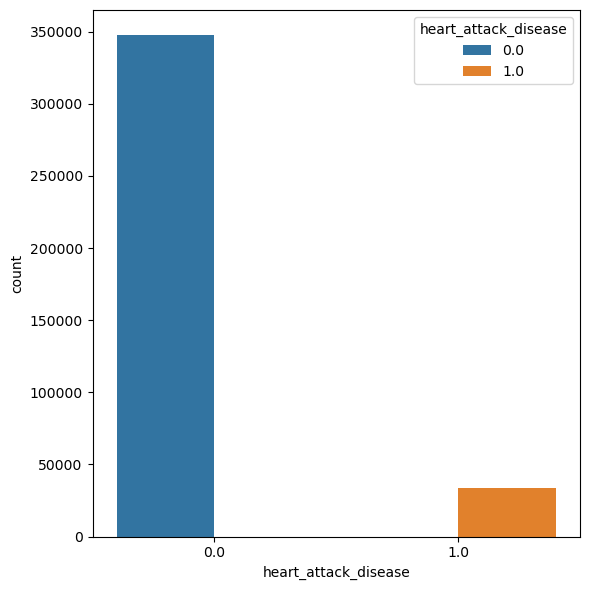

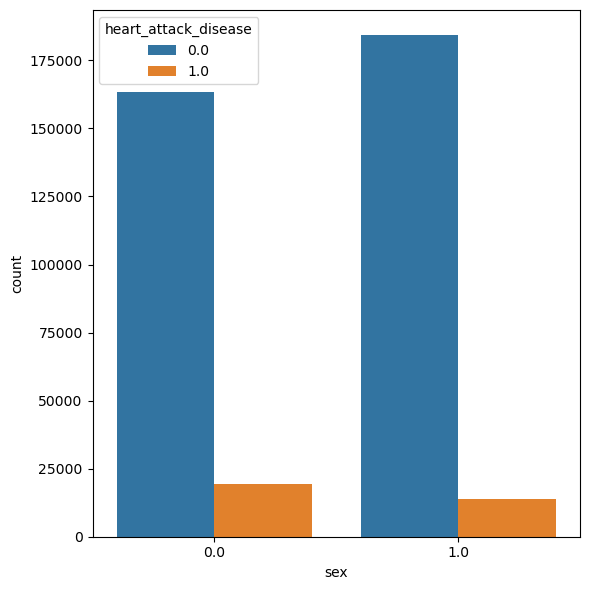

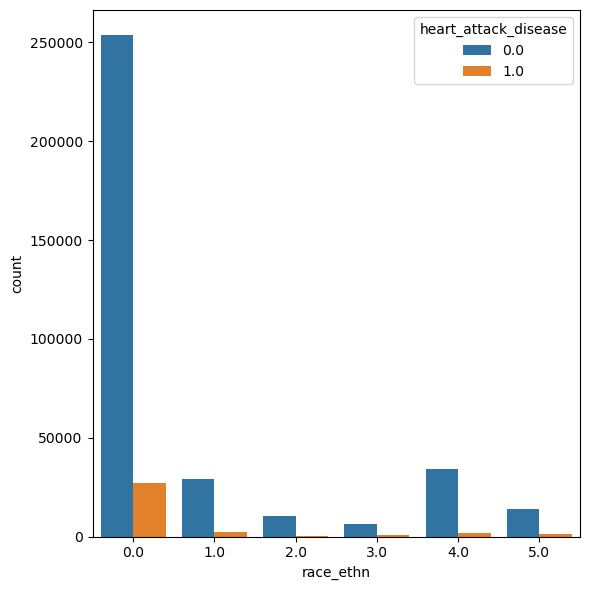

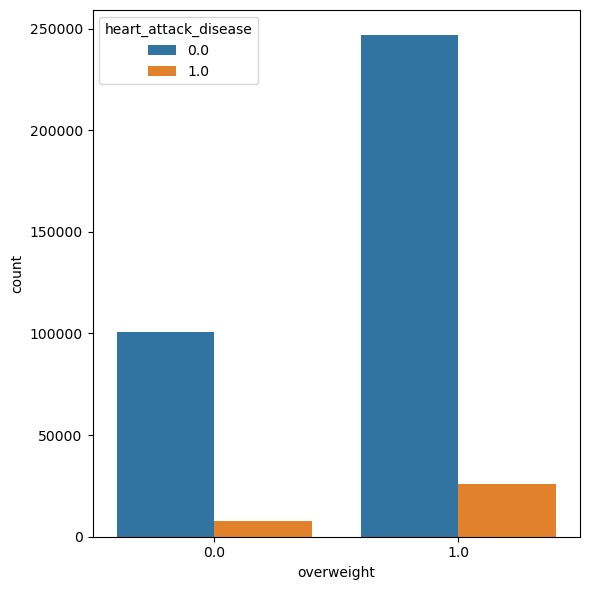

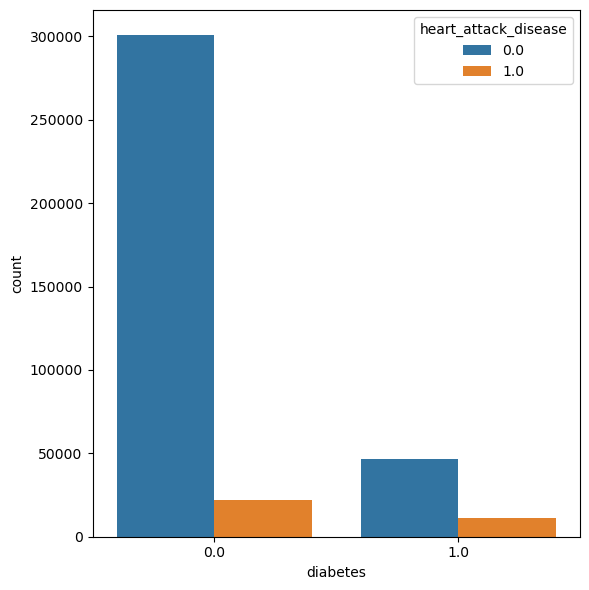

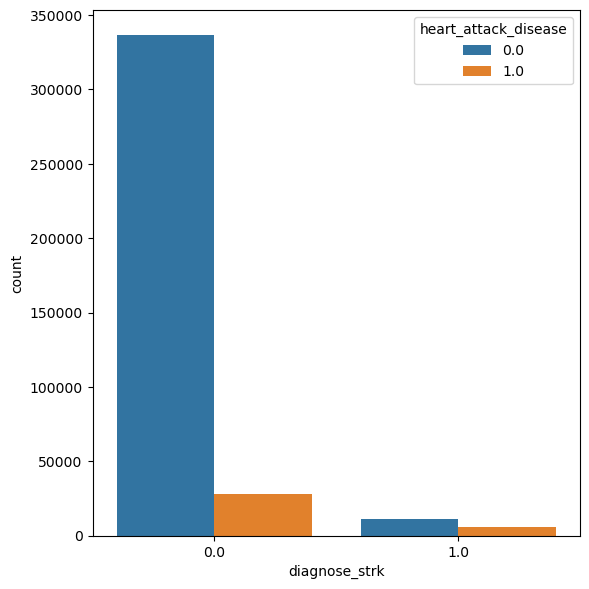

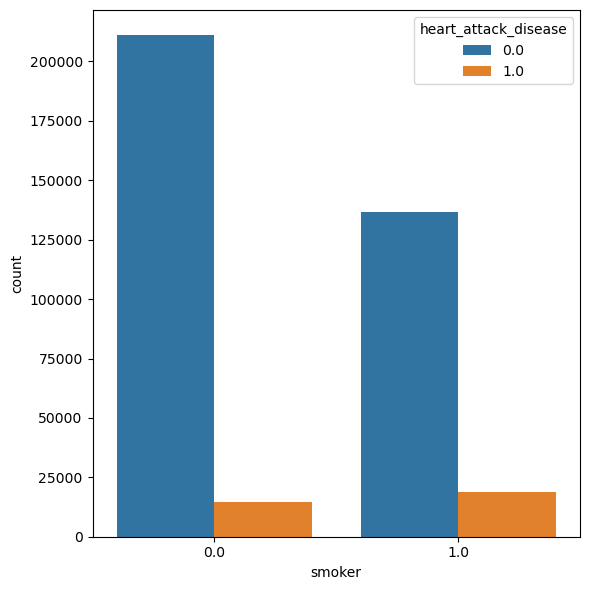

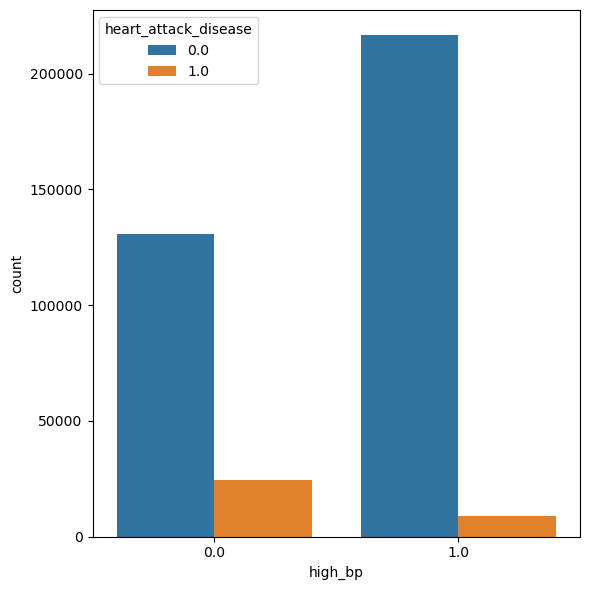

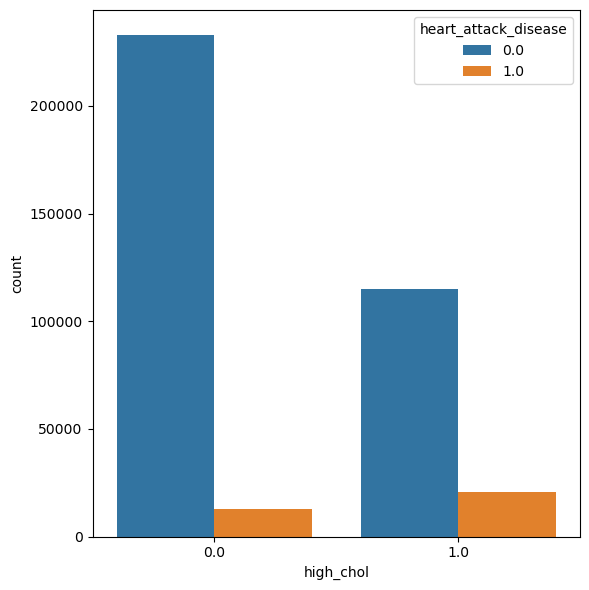

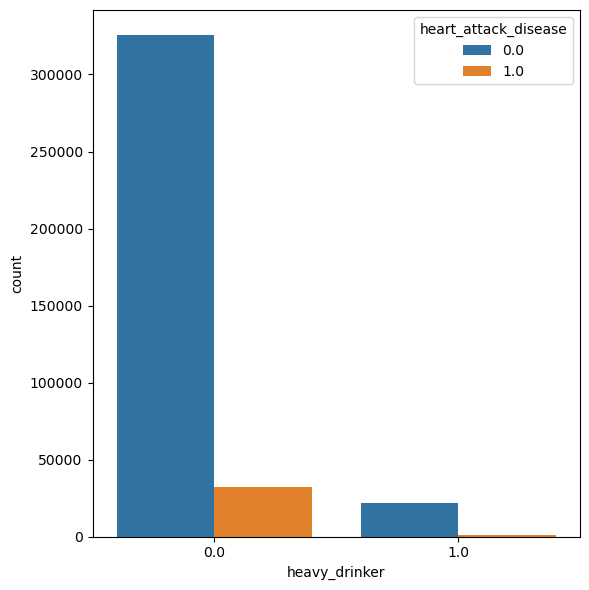

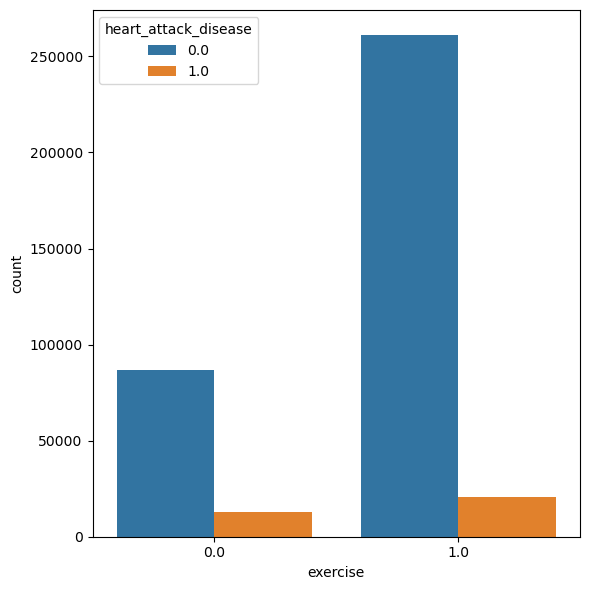

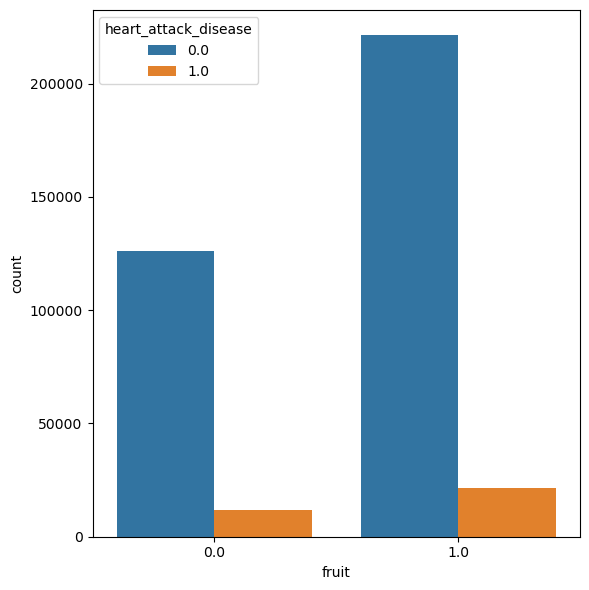

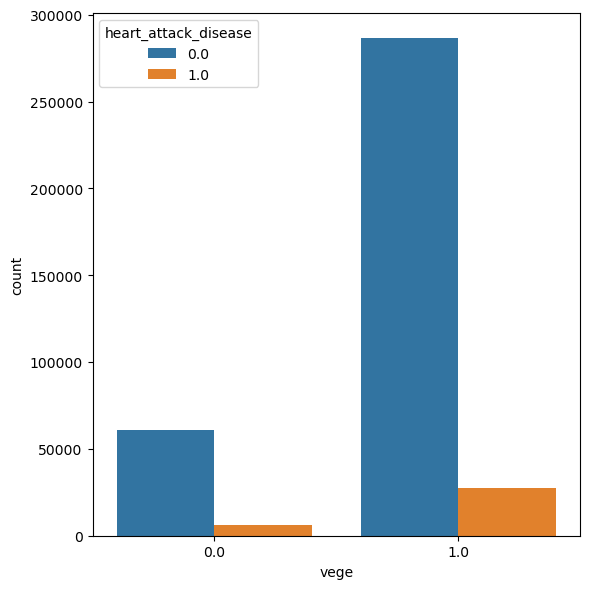

In [7]:
#fig, ax = plt.subplots(14, 1, figsize=(15, 6))

for i in cat_ft:
    fig, ax = plt.subplots(figsize = (6,6))

    sns.countplot(data=df, x=df[i], ax=ax, hue= 'heart_attack_disease')
    plt.tight_layout()
    plt.show()

In [8]:
df.shape

(381147, 15)

Target 

<AxesSubplot:>

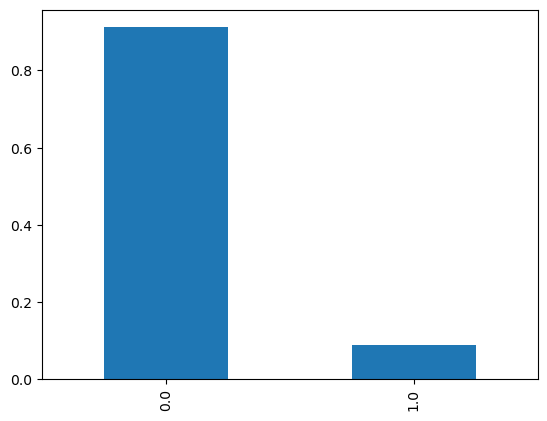

In [9]:
target_heart = df.heart_attack_disease.value_counts(normalize = True)

target_heart.plot(kind= 'bar')

In [10]:
#class is imbalanced , 10% occurs for positive class 

In [11]:
#imbalanced --> true neg are majority, true positives are minority --> may need to upsample


Features
a) categorial + ordinal 

<AxesSubplot:xlabel='sex', ylabel='count'>

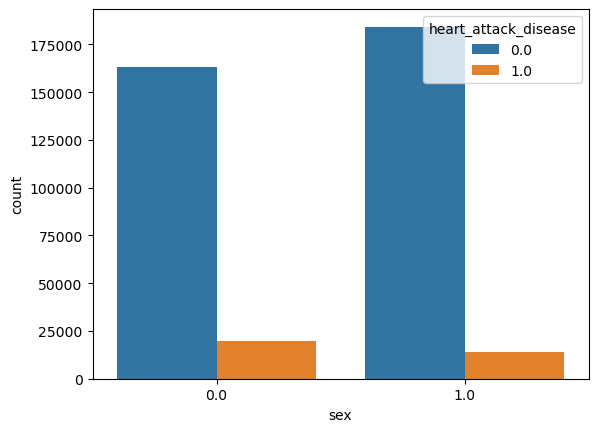

In [12]:
#sex
sns.countplot(data = df, x= df['sex'], hue = 'heart_attack_disease')

<AxesSubplot:xlabel='age', ylabel='count'>

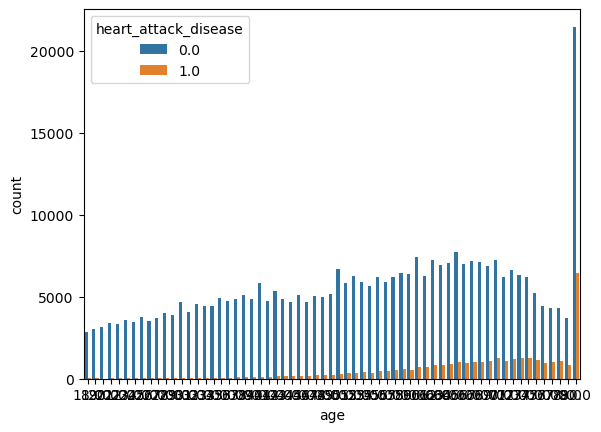

In [13]:
#age
sns.countplot(data = df, x= df['age'], hue = 'heart_attack_disease')

In [14]:
#w/ greater age means more chance of getting a heart attack or disease 

<AxesSubplot:xlabel='race_ethn', ylabel='count'>

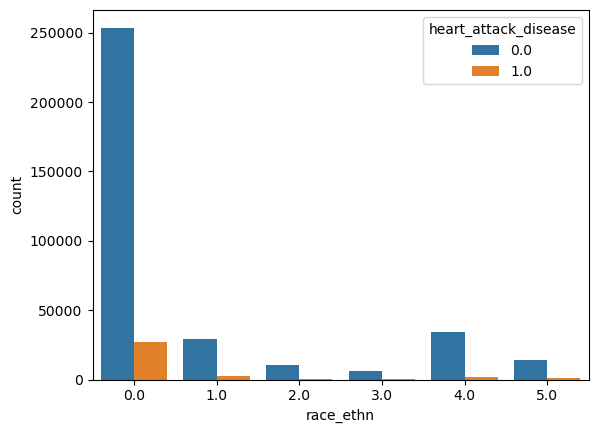

In [15]:
#race_ethn
sns.countplot(data = df, x= df['race_ethn'], hue= 'heart_attack_disease')

<AxesSubplot:xlabel='overweight', ylabel='count'>

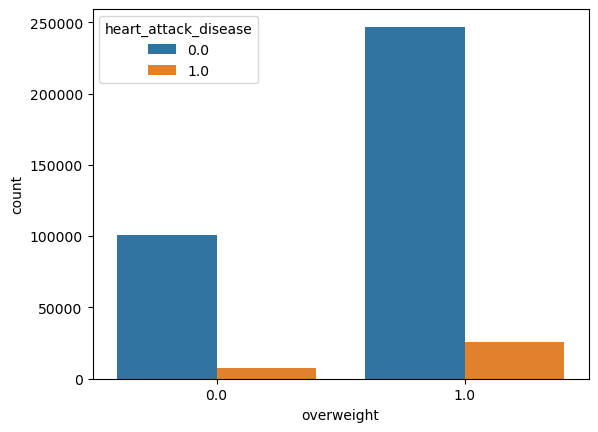

In [16]:
#overweight
sns.countplot(data = df, x= df['overweight'], hue = 'heart_attack_disease')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

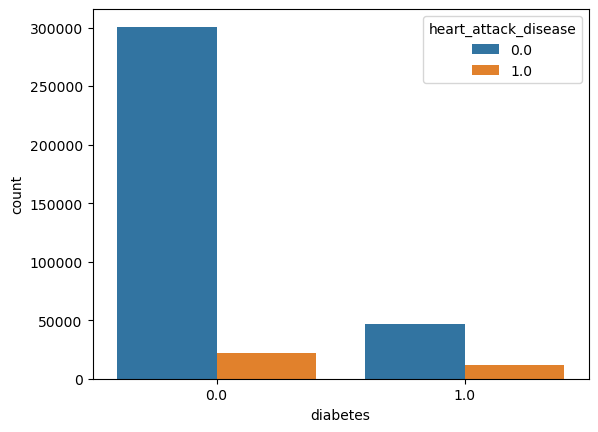

In [17]:
#diabetes
sns.countplot(data = df, x = df['diabetes'], hue = 'heart_attack_disease')

<AxesSubplot:xlabel='diagnose_strk', ylabel='count'>

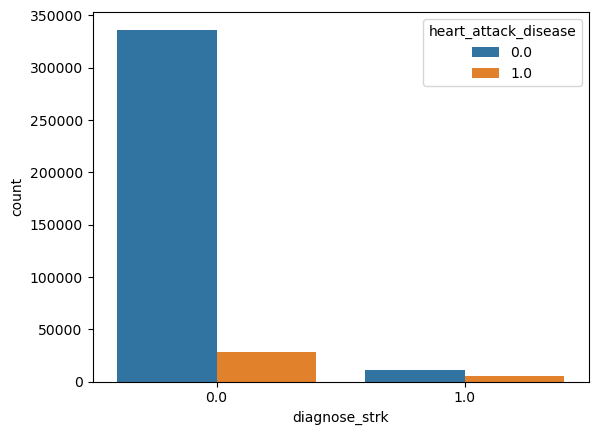

In [18]:
#diagnose_strk
sns.countplot(data = df, x = df['diagnose_strk'], hue = "heart_attack_disease")

<AxesSubplot:xlabel='smoker', ylabel='count'>

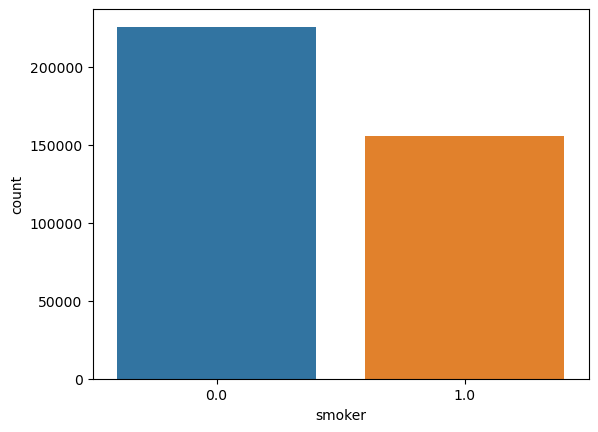

In [19]:
#smoker
sns.countplot(df['smoker'])

<AxesSubplot:xlabel='high_bp', ylabel='count'>

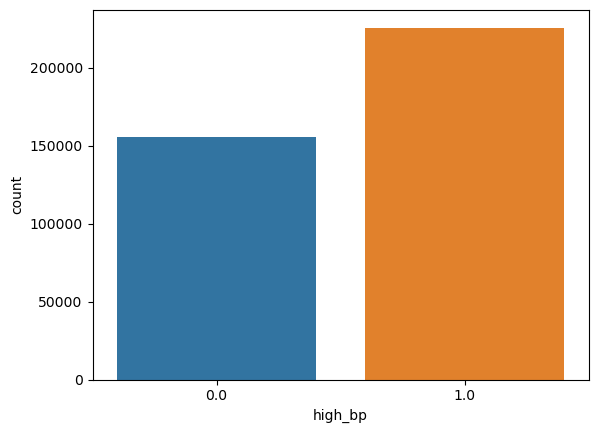

In [20]:
#high bp 
sns.countplot(df['high_bp'])

<AxesSubplot:xlabel='high_chol', ylabel='count'>

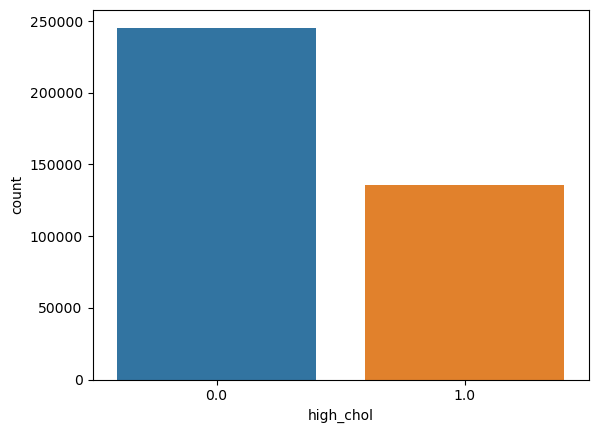

In [21]:
#high chol
sns.countplot(df['high_chol'])

<AxesSubplot:xlabel='bmi', ylabel='count'>

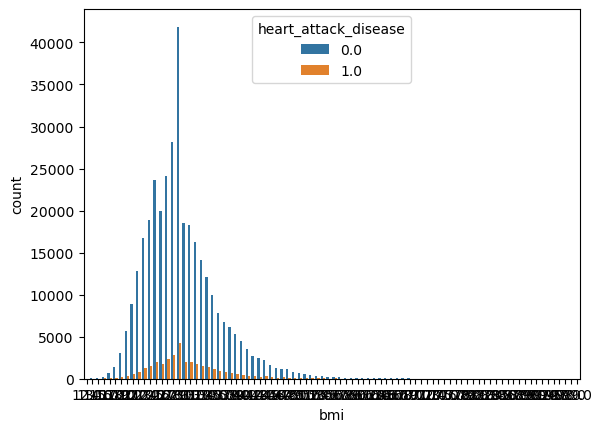

In [22]:
#bmi 
fig, ax = figsize= (10, 10)
sns.countplot(data = df, x= df['bmi'], hue = 'heart_attack_disease')

<AxesSubplot:xlabel='age', ylabel='count'>

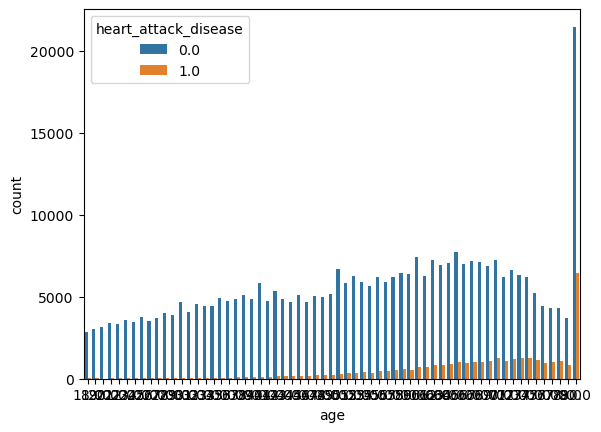

In [23]:
#age
fig, ax = figsize= (10, 10)
sns.countplot(data = df, x= df['age'], hue = 'heart_attack_disease')

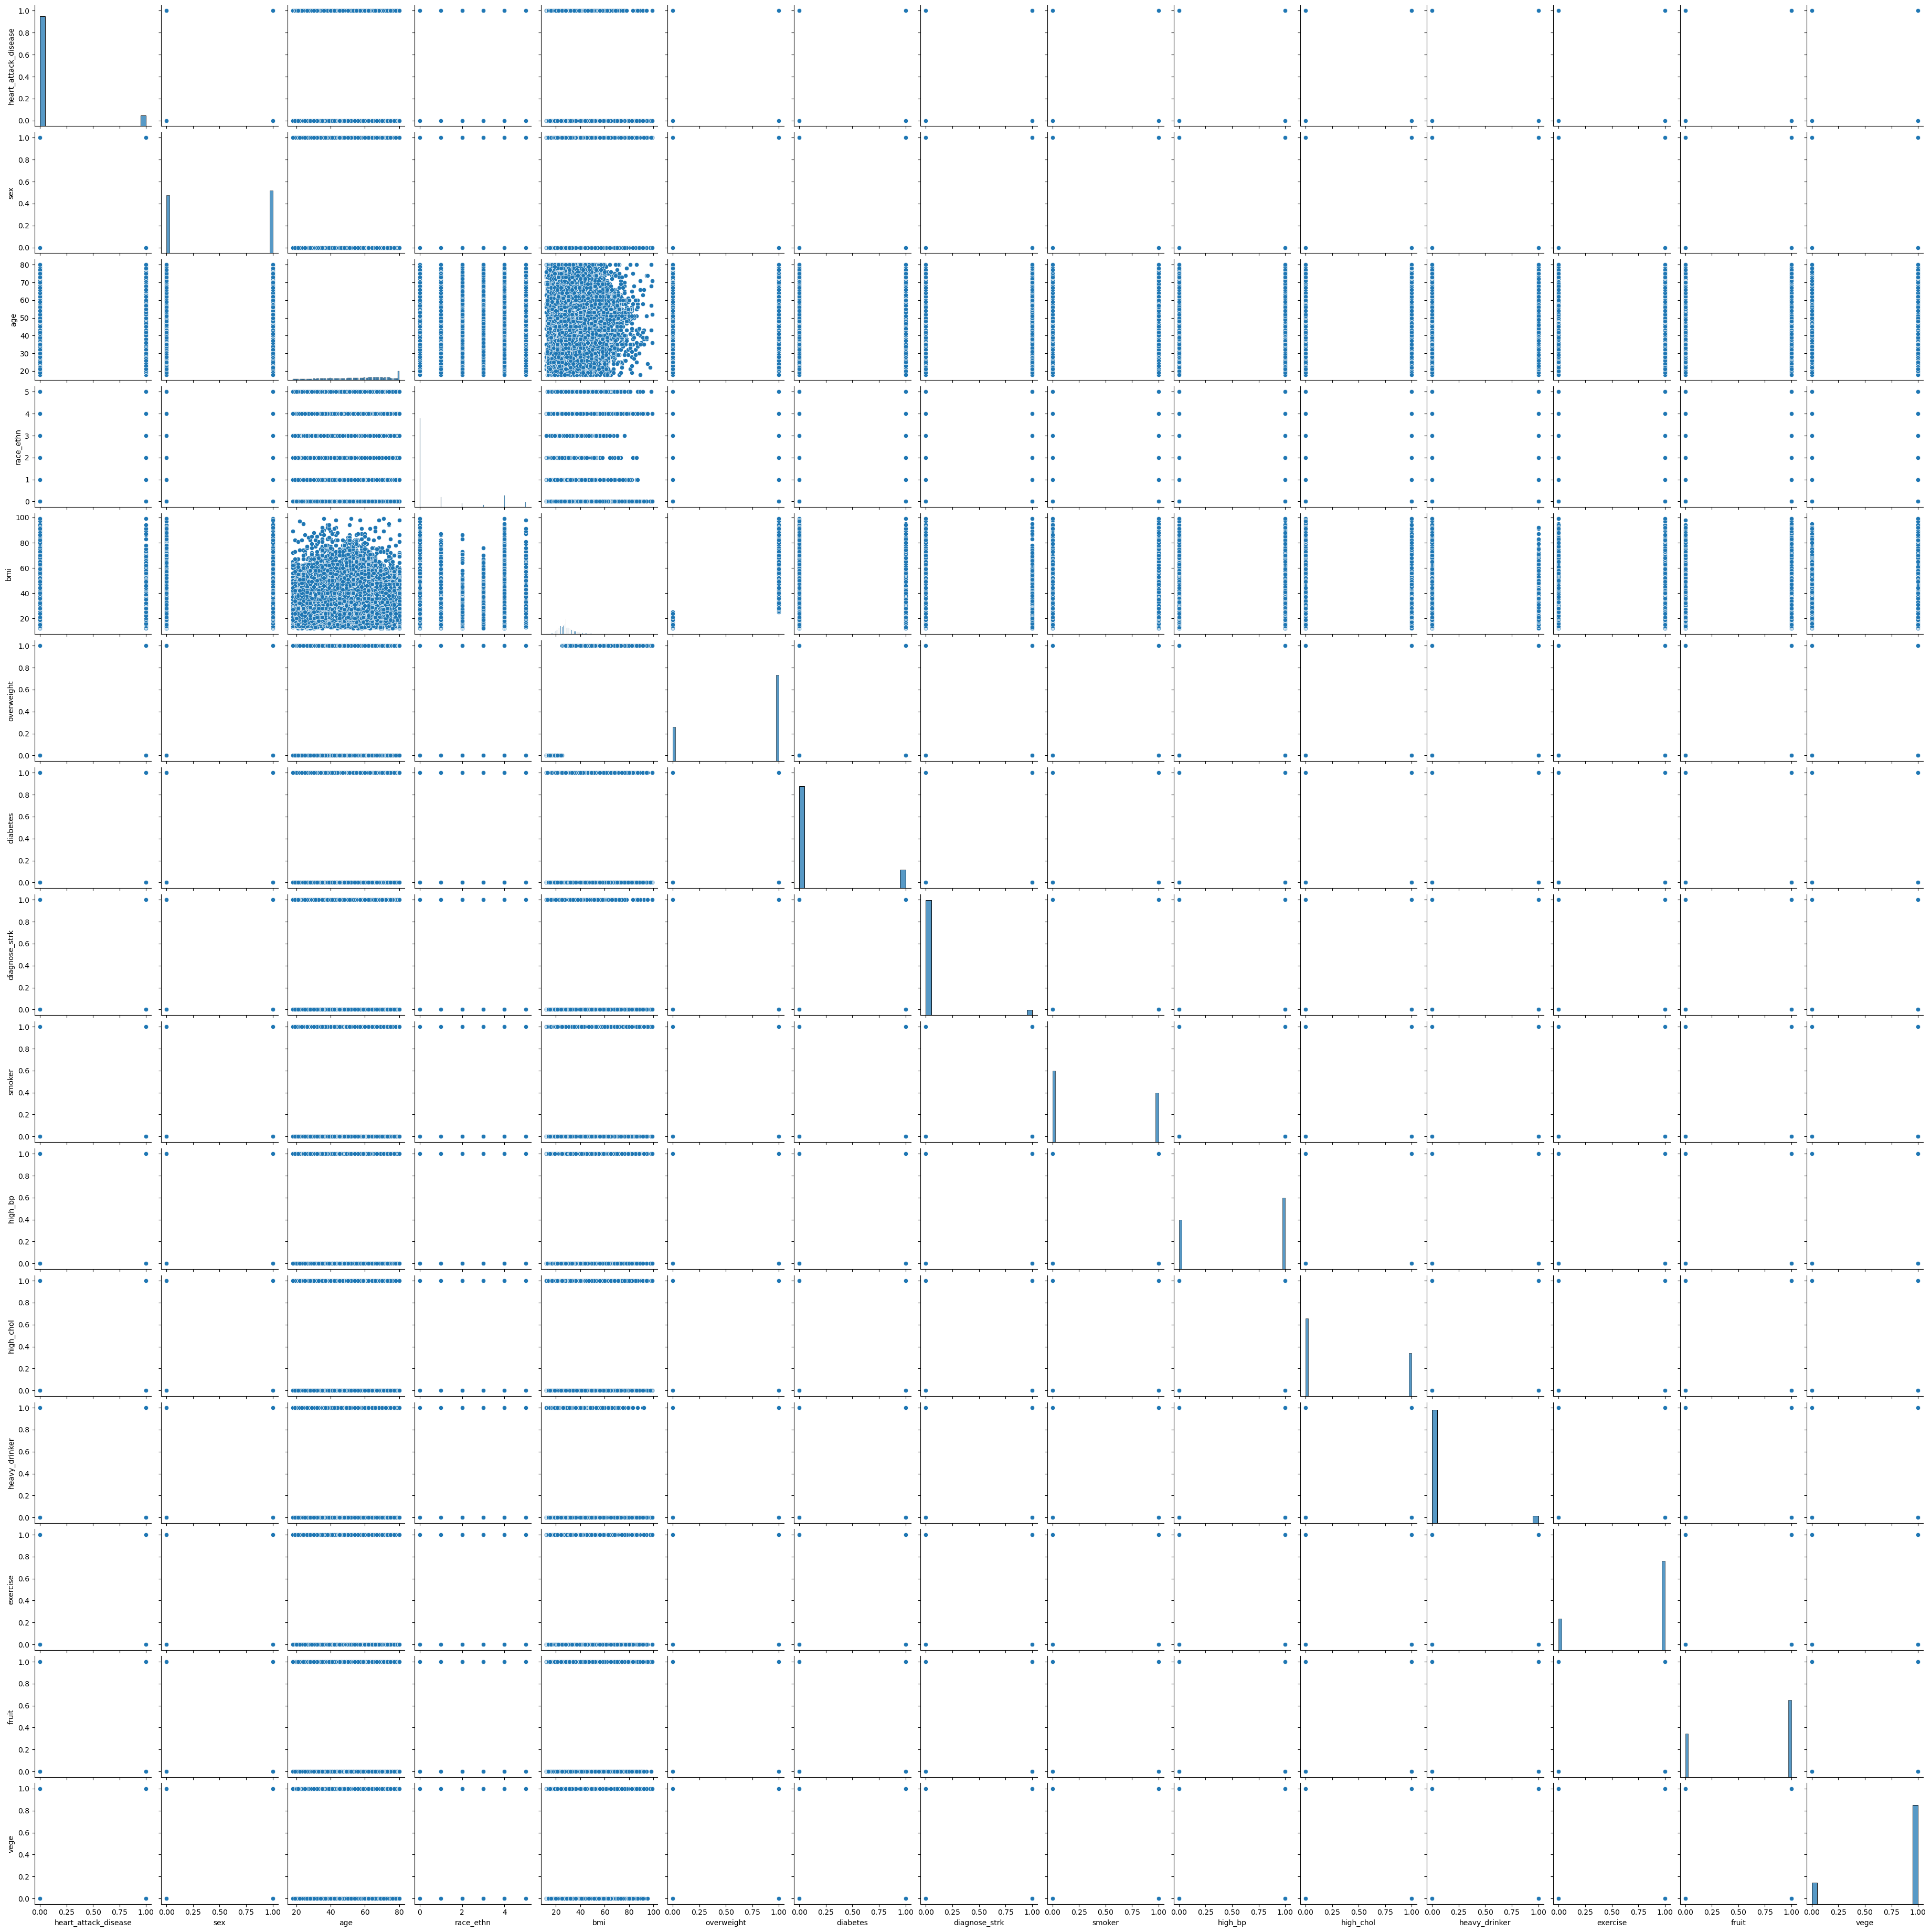

In [24]:
#pairplot 

sns.pairplot(df)

<AxesSubplot:>

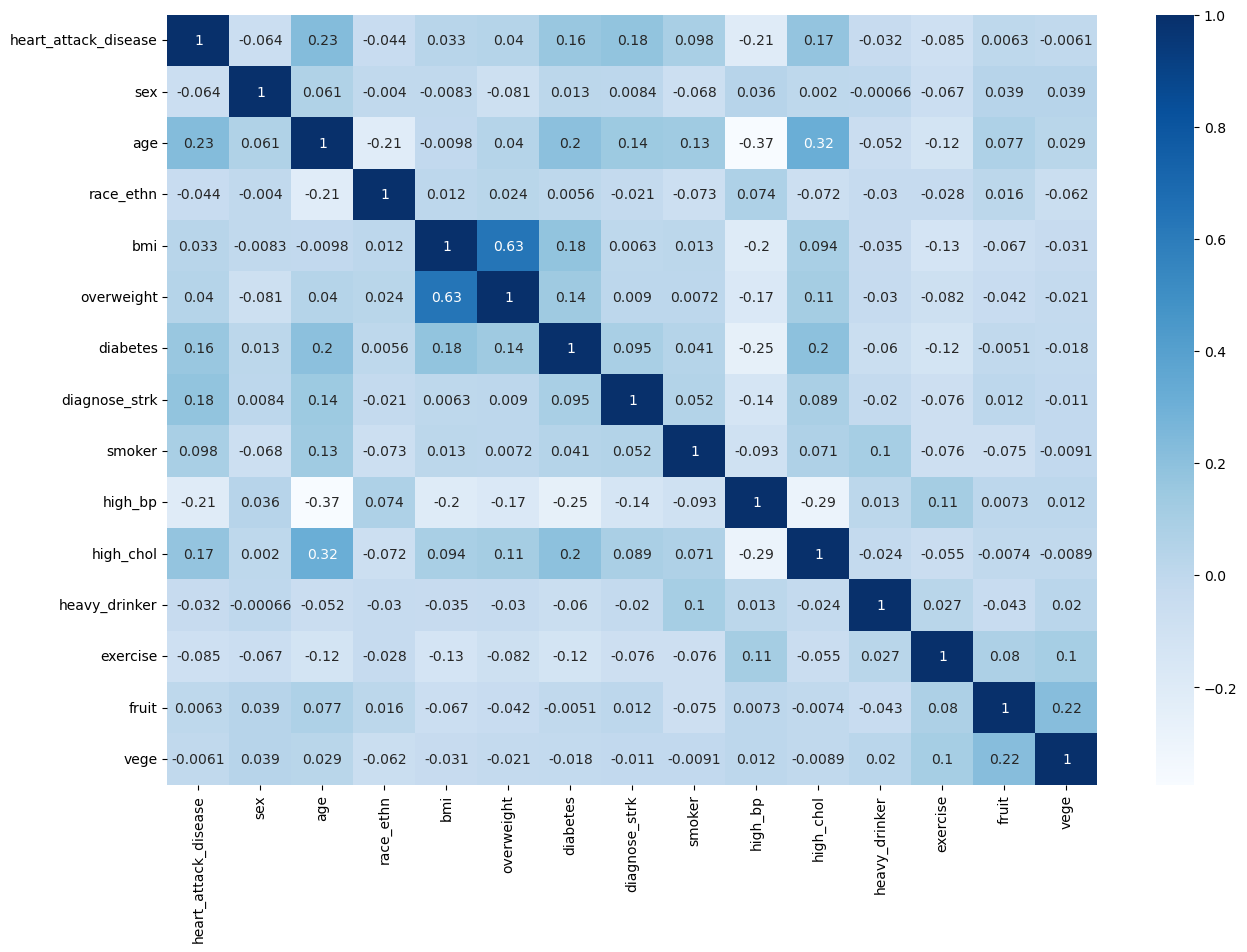

In [25]:
#heatmap 

plt.figure(figsize = [15,10])
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

In [26]:
#get correlations with target
df.corr()['heart_attack_disease'].sort_values(ascending = False)

heart_attack_disease    1.000000
age                     0.230584
diagnose_strk           0.182247
high_chol               0.173604
diabetes                0.161864
smoker                  0.097909
overweight              0.039744
bmi                     0.032960
fruit                   0.006310
vege                   -0.006058
heavy_drinker          -0.032432
race_ethn              -0.043916
sex                    -0.063978
exercise               -0.085269
high_bp                -0.205796
Name: heart_attack_disease, dtype: float64

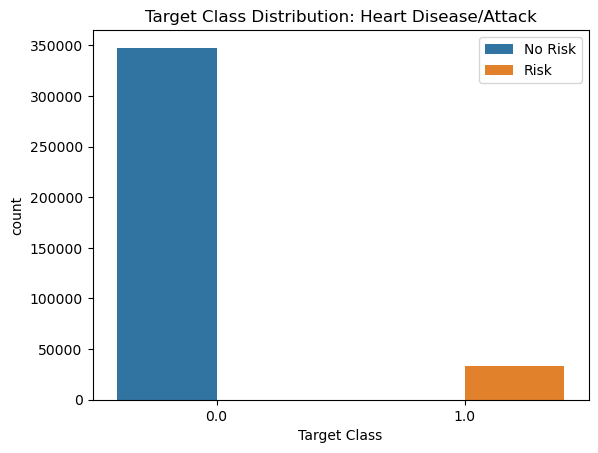

In [14]:
sns.countplot(data = df, x= df['heart_attack_disease'], hue = 'heart_attack_disease')

plt.title("Target Class Distribution: Heart Disease/Attack")
plt.xlabel('Target Class')

legend_labels = ['No Risk', 'Risk']

plt.legend(labels = legend_labels, loc = 'upper right')
plt.savefig('target_class.png', bbox_inches='tight')